In [1]:
from __future__ import print_function

try:
    import urllib2 as ulib
except ImportError:
    import urllib as ulib

try:
    from StringIO import BytesIO as io
except ImportError:
    from io import BytesIO as io

try:
    from urllib import urlencode as urlencode
except ImportError:
    from urllib.parse import urlencode as urlencode
    
try:
    from urllib import urlopen as urlopen
except ImportError:
    from urllib.request import urlopen as urlopen
    
try:
    from urllib2 import HTTPError as HTTPError
except ImportError:
    from urllib.error import HTTPError as HTTPError

import pandas as pd
import os
import matplotlib as plt
import geopandas as gpd
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
url = "https://data.cityofnewyork.us/api/views/nu7n-tubp/rows.csv?accessType=DOWNLOAD"
ulib.request.urlretrieve(url, "nycdogs.csv")
!mv nycdogs.csv $PUIDATA

In [3]:
nycdogs = pd.read_csv(os.getenv("PUIDATA") + "/nycdogs.csv")

In [4]:
nycdogs.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate
0,1753,SHADOW,M,01/01/2000 12:00:00 AM,Beagle,Brooklyn,11236.0,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016
1,2415,ROCCO,M,10/01/2011 12:00:00 AM,Boxer,Brooklyn,11210.0,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016
2,3328,LUIGI,M,09/01/2005 12:00:00 AM,Maltese,Bronx,10464.0,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016
3,7537,PETUNIA,F,08/01/2013 12:00:00 AM,Pug,Brooklyn,11221.0,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016
4,8487,ROMEO,M,10/01/2008 12:00:00 AM,Maltese,Bronx,10451.0,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016


In [5]:
nycdogs.dtypes

RowNumber                    int64
AnimalName                  object
AnimalGender                object
AnimalBirthMonth            object
BreedName                   object
Borough                     object
ZipCode                    float64
CommunityDistrict          float64
CensusTract2010            float64
NTA                         object
CityCouncilDistrict        float64
CongressionalDistrict      float64
StateSenatorialDistrict    float64
LicenseIssuedDate           object
LicenseExpiredDate          object
dtype: object

In [6]:
nycdogs['LicenseIssuedDate'] = pd.to_datetime(nycdogs['LicenseIssuedDate'])

In [7]:
nycdogs2016 = nycdogs[nycdogs['LicenseIssuedDate'].dt.year == 2016.0]

In [8]:
nycdogsbreed2016 = nycdogs2016.groupby('BreedName').count()
nycdogsbreed2016.reset_index(drop=False, inplace=True)
nycdogsbreed2016 = nycdogsbreed2016[[0,1]]
nycdogsbreed2016.sort_values(by='RowNumber', ascending=False, inplace=True)
nycdogsbreed2016.reset_index(drop=True, inplace=True)
nycdogsbreed2016.rename(columns={'RowNumber': 'Total'}, inplace=True)
nycdogsbreed2016.head()

,BreedName,Total
0,Unknown,10385
1,Yorkshire Terrier,4929
2,Shih Tzu,4501
3,Chihuahua,3594
4,Maltese,2655


In [9]:
# remove first row since breed is unknown
nycdogsbreed2016.drop([0], axis=0, inplace=True)
nycdogsbreed2016.head()

,BreedName,Total
1,Yorkshire Terrier,4929
2,Shih Tzu,4501
3,Chihuahua,3594
4,Maltese,2655
5,Labrador Retriever,2545


In [10]:
top10 = nycdogsbreed2016.head(10)

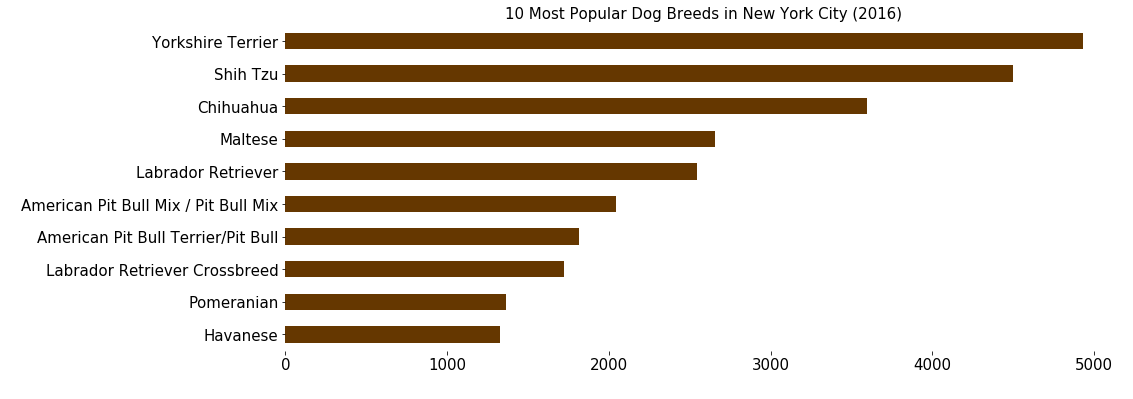

In [11]:
ax = top10.plot(figsize=(15,6), kind='barh', x='BreedName', legend=False, color='xkcd:brown', fontsize=15)
ax.set_title("10 Most Popular Dog Breeds in New York City (2016)", fontsize=15)
ax.set_xlabel(" ", fontsize=15)
ax.set_ylabel(" ")
ax.set_frame_on(False)
plt.gca().invert_yaxis()

The 10 most popular dog breeds in NYC in 2016, based on the number of licenses issued in 2016.

In [12]:
nycdogs2016.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate
45,47793,SACHI,F,10/01/2006 12:00:00 AM,Chow Chow,Queens,11385.0,405.0,637.0,QN19,30.0,6.0,15.0,2016-01-15,02/12/2017
46,48071,NIKO,M,10/01/2013 12:00:00 AM,Pug,Queens,11357.0,407.0,991.0,QN49,19.0,3.0,11.0,2016-01-17,03/02/2017
47,50583,GOGO,F,04/01/2008 12:00:00 AM,Pug,Manhattan,10003.0,102.0,59.0,MN23,2.0,12.0,27.0,2016-02-02,04/05/2017
48,52086,KAI,M,09/01/2007 12:00:00 AM,Unknown,Bronx,10456.0,203.0,151.0,BX35,17.0,15.0,32.0,2016-02-09,02/21/2017
49,52822,MAX,M,01/01/2004 12:00:00 AM,Unknown,Bronx,10473.0,209.0,28.0,BX09,17.0,15.0,32.0,2016-02-12,12/30/2016


In [13]:
url = "https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip"
ulib.request.urlretrieve(url, "zipcode.zip")
!unzip -d $PUIDATA zipcode.zip

Archive:  zipcode.zip
replace /nfshome/rms818/PUIdata/ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [21]:
zipcodeshp = gpd.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/ZIP_CODE_040114.shp')

In [22]:
zipcodeshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [23]:
nycdogs2016['ZipCode'] = nycdogs2016['ZipCode'].astype(int)
nycdogs_zipcode = nycdogs2016.groupby('ZipCode').count()
nycdogs_zipcode = nycdogs_zipcode[[0]]
nycdogs_zipcode.reset_index(drop=False, inplace=True)
nycdogs_zipcode.rename(columns={'ZipCode': 'ZIPCODE', 'RowNumber': 'Total Dogs'}, inplace=True)
nycdogs_zipcode.head(10)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ZIPCODE,Total Dogs
0,1003,1
1,1175,2
2,7013,1
3,7030,1
4,7093,1
5,7302,1
6,10001,555
7,10002,702
8,10003,949
9,10004,75


In [24]:
zipcodeshp.ZIPCODE = zipcodeshp['ZIPCODE'].astype(int)

In [25]:
nycdogs_zipcodeshp = zipcodeshp.merge(nycdogs_zipcode, on='ZIPCODE')

In [26]:
nycdogs_zipcodeshp = gpd.GeoDataFrame(nycdogs_zipcodeshp)

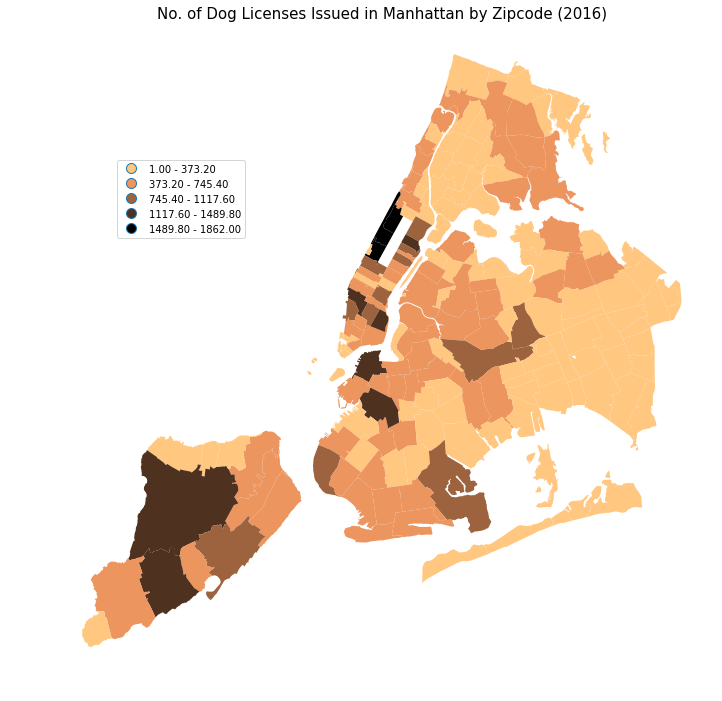

In [34]:
ax = nycdogs_zipcodeshp.plot(column='Total Dogs', legend=True, figsize=(15,12), cmap='copper_r', scheme='equal_interval')
ax.set_axis_off()
ax.set_title('No. of Dog Licenses Issued in Manhattan by Zipcode (2016)', fontsize=15)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.3,0.8))

**Figure 1**: Choropleth of the number of dog licenses issued in 2016 by zipcode. The darker the area, the higher the number of dog licenses issued to owners residing in the zipcodes. We can observe that the highest number of dog licenses are issued in Upper West Side, followed by the west side of Staten Island and Great Kills, DUMBO, Brooklyn Heights, Gowanus, Park Slope, and Upper East Side. Coney Island, east of Queens (around Jamaica), and the Bronx seem to have the lowest number of dog licenses issued.